<a href="https://colab.research.google.com/github/lucaspss/Object-Detection-OpenCV/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

width = 1028
height = 1028

img = cv2.imread('./image_1.jpg')

inp = cv2.resize(img, (width , height ))

rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

rgb_tensor = tf.expand_dims(rgb_tensor , 0)

In [25]:
import tensorflow_hub as hub
import pandas as pd

detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

labels = pd.read_csv('./labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [26]:

boxes, scores, classes, num_detections = detector(rgb_tensor)

pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]


for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

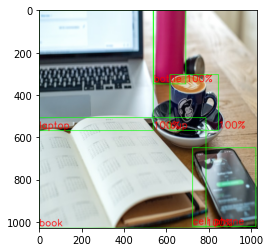

In [27]:
plt.imshow(img_boxes)